In [149]:
import pandas as pd # For data manupulation
import matplotlib.pyplot as plt # For visualizations
import seaborn as sns # For visualizations
import string # For string manupulation (removing punctuations)
import re # For tokenization

import nltk
from nltk.corpus import stopwords
wn = nltk.WordNetLemmatizer() # For lemmeatization
ps = nltk.PorterStemmer() # If stemmer is to be used in place of lemmatization

In [150]:
# Import the data
yelp_data = pd.read_csv('C:/Users/rohit/Downloads/yelp.csv')

In [151]:
yelp_data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [152]:
# To get an insight on the length of each review, we can create a new column in yelp called text length. 
# This column will store the number of characters in each review.

yelp_data['text lenght'] = yelp_data['text'].apply(len)
yelp_data.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny,text lenght
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0,889
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0,1345
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0,76
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0,419
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0,469


## Exploring the dataset

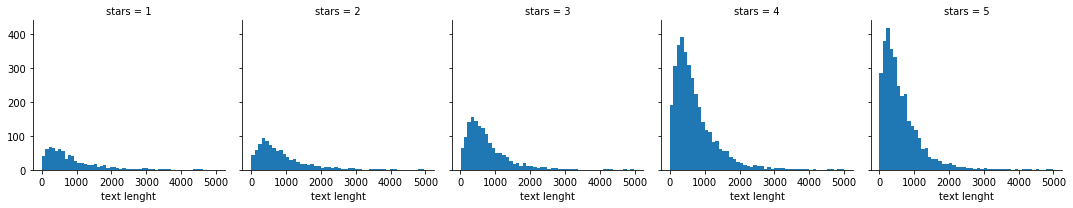

In [153]:
# To check for any similarities in star ratings with respect to lenght of the review
g = sns.FacetGrid(data=yelp_data, col='stars')
g.map(plt.hist, 'text lenght', bins=50)

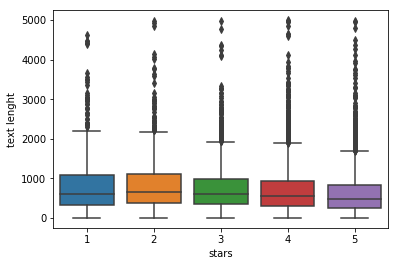

In [154]:
#Boxplot to test for outliers
sns.boxplot(x='stars', y='text lenght', data=yelp_data)

In [155]:
# To determine correlation between features
stars = yelp_data.groupby('stars').mean()
stars.corr()

,cool,useful,funny,text lenght
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text lenght,-0.857664,0.699881,0.843461,1.000000


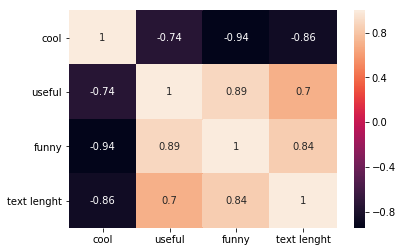

In [156]:
sns.heatmap(data=stars.corr(), annot=True)

In [157]:
# Task is to predict good and bad reviews so we leave 3 star ratings

yelp_class = yelp_data[(yelp_data['stars'] == 1) | (yelp_data['stars'] == 5)]
yelp_class.shape

(4086, 11)

In [158]:
# Defining the dependent and independent variables

X = yelp_class['text']
y = yelp_class['stars']

In [159]:
X[1]

'I have no idea why some people give bad reviews about this place. It goes to show you, you can please everyone. They are probably griping about something that their own fault...there are many people like that.\n\nIn any case, my friend and I arrived at about 5:50 PM this past Sunday. It was pretty crowded, more than I thought for a Sunday evening and thought we would have to wait forever to get a seat but they said we\'ll be seated when the girl comes back from seating someone else. We were seated at 5:52 and the waiter came and got our drink orders. Everyone was very pleasant from the host that seated us to the waiter to the server. The prices were very good as well. We placed our orders once we decided what we wanted at 6:02. We shared the baked spaghetti calzone and the small "Here\'s The Beef" pizza so we can both try them. The calzone was huge and we got the smallest one (personal) and got the small 11" pizza. Both were awesome! My friend liked the pizza better and I liked the ca

## Cleaning the data

In [160]:
def clean_text(text):
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
'''
    #To remove all puctuations
    text = "".join([word for word in text if word not in string.punctuation])
    
    # Tonkenization
    token = re.split('\W+', text)
    
    # As python is case sensitive we convert every word in its lower case
    text = [word for word in token if word.lower() not in stopwords.words('english')]
    
    #Lemmantization
    #text = [wn.lemmatize(word) for word in text]
    return text
'''

'\n    #To remove all puctuations\n    text = "".join([word for word in text if word not in string.punctuation])\n    \n    # Tonkenization\n    token = re.split(\'\\W+\', text)\n    \n    # As python is case sensitive we convert every word in its lower case\n    text = [word for word in token if word.lower() not in stopwords.words(\'english\')]\n    \n    #Lemmantization\n    #text = [wn.lemmatize(word) for word in text]\n    return text\n'

In [161]:
sample_text = "Hey there! This is a sample review, which happens to contain punctuations. Means, meaning, meant and might"

print(clean_text(sample_text))

['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations', 'Means', 'meaning', 'meant', 'might']


## Vectorization

##### Process of encoding text as integers to create feature vectors (n-dimensional vector of numerical features that represent some object). Raw text needs to be converted to integers so that the ML models can understand.

In [162]:
#In this case we will be using Count Vectorizer to convert the text collection into a matrix of token counts.

from sklearn.feature_extraction.text import CountVectorizer

In [163]:
count_vect = CountVectorizer(analyzer = clean_text)
X_cnt = count_vect.fit(X) # fitting as well as transforming it to a feature vector
X_count = X_cnt.transform(X)
#print(X_count.shape)
#print(count_vect.get_feature_names())
len(count_vect.vocabulary_)

26435

## Training the model

In [164]:
# Preparing the train and test data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_count, y, 
                                                    test_size=0.3, 
                                                    random_state=101)

In [165]:
# Model 1 (Baseline)
# Multinomial Naive Bayes model

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb_model = nb.fit(X_train, y_train)

In [166]:
# Model 2
# Random Forest
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score
rf = RandomForestClassifier(n_jobs = -1)
k_fold = KFold(n_splits = 5)

cross_val_score(rf, X_count, y, cv = k_fold, scoring = 'accuracy', n_jobs = -1)

array([0.87652812, 0.87760098, 0.89596083, 0.85801714, 0.86168911])

In [181]:
rf = RandomForestClassifier(n_estimators = 1000, 
                            max_depth = 50,
                            n_jobs = -1)
rf_model = rf.fit(X_train, y_train)

## Testing and evaluating models

In [182]:
y_pred_nb = nb_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [183]:
from sklearn.metrics import confusion_matrix, classification_report

conf_matrix_nb = confusion_matrix(y_test, y_pred_nb)
report_nb = classification_report(y_test, y_pred_nb)

conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print('Results for Naive Bayes model is:')
print(conf_matrix_nb, '\n', report_nb)

print('Result for Random forest model is:')
print(conf_matrix_rf, '\n', report_rf)

Results for Naive Bayes model is:
[[157  71]
 [ 24 974]] 
              precision    recall  f1-score   support

          1       0.87      0.69      0.77       228
          5       0.93      0.98      0.95       998

avg / total       0.92      0.92      0.92      1226

Result for Random forest model is:
[[ 32 196]
 [  0 998]] 
              precision    recall  f1-score   support

          1       1.00      0.14      0.25       228
          5       0.84      1.00      0.91       998

avg / total       0.87      0.84      0.79      1226



## Why incorrect prediction in case of Random Forest

#### One explanation as to why this may be the case is that our initial dataset had a much higher number of 5-star reviews than 1-star reviews. This means that the model is more biased towards positive reviews compared to negative ones.

#### If we consider all the star review we can see the same thing as there are a much higher number of 5 and 4 stars than all the others combined. In conclusion, although our model was a little biased towards positive reviews, it was fairly accurate with its predictions, achieving an accuracy of 92% on the test set.